# BernardCui2014-DiscreteVarianceSwap

### Title: 
__Prices and Asymptotics for Discrete Variance Swaps__

### Authors:
* Carole Bernard
* Zhenyu Cui

### Abstract:
We study the fair strike of a discrete variance swap for a general time-homogeneous stochastic volatility model. In the special cases of Heston, Hull–White and Schöbel–Zhu stochastic volatility models, we give simple explicit expressions (improving Broadie and Jain (2008a). The effect of jumps and discrete sampling on volatility and variance swaps. International Journal of Theoretical and Applied Finance, 11(8), 761–797) in the case of the Heston model). We give conditions on parameters under which the fair strike of a discrete variance swap is higher or lower than that of the continuous variance swap. The interest rate and the correlation between the underlying price and its volatility are key elements in this analysis. We derive asymptotics for the discrete variance swaps and compare our results with those of Broadie and Jain (2008a. The effect of jumps and discrete sampling on volatility and variance swaps. International Journal of Theoretical and Applied Finance, 11(8), 761–797), Jarrow et al. (2013. Discretely sampled variance and volatility swaps versus their continuous approximations. Finance and Stochastics, 17(2), 305–324) and Keller-Ressel and Griessler (2012. Convex order of discrete, continuous and predictable quadratic variation and applications to options on variance. Working paper.

### Link:
* https://doi.org/10.1080/1350486X.2013.820524

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

### Uncomment below if you want to run on your modified code
import sys
#sys.path.insert(sys.path.index('')+1, 'D:/Github/PyFENG')
#import pyfeng as pf

np.set_printoptions(precision=4)

# Heston Model: Figure 1. (Left Panel)

In [3]:
### Any Heston model will do.
m = pf.HestonFft(0.010201, vov=0.31, rho=-0.7, mr=6.21, theta=0.019, intr=0.0319)

In [4]:
texp = 1
k_inf = m.strike_var_swap_analytic(texp, 0)

a = np.arange(1, 36)
dt = texp/a

m.rho = -0.7
k_dis1 = m.strike_var_swap_analytic(texp, dt)
m.rho = 0
k_dis2 = m.strike_var_swap_analytic(texp, dt)
m.rho = 0.7
k_dis3 = m.strike_var_swap_analytic(texp, dt)

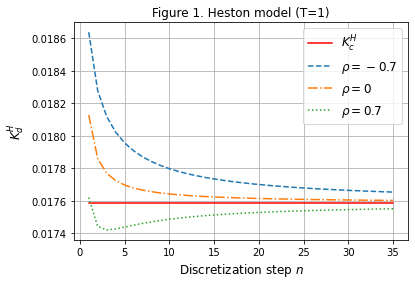

In [5]:
plt.plot(a, k_inf*np.ones_like(a), linestyle='-', color='r', label='$K_c^H$')
plt.plot(a, k_dis1, linestyle='--', label='$\\rho = -0.7$')
plt.plot(a, k_dis2, linestyle='-.', label='$\\rho = 0$')
plt.plot(a, k_dis3, linestyle=':', label='$\\rho = 0.7$')

plt.xlabel('Discretization step $n$', fontsize=12)
plt.ylabel('$K_d^H$', fontsize=12)
plt.title(f'Figure 1. Heston model (T={texp})', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [6]:
texp = 1/12
k_inf = m.strike_var_swap_analytic(texp, 0)

a = np.arange(1, 16)
dt = texp/a

m.rho = -0.7
k_dis1 = m.strike_var_swap_analytic(texp, dt)
m.rho = 0
k_dis2 = m.strike_var_swap_analytic(texp, dt)
m.rho = 0.7
k_dis3 = m.strike_var_swap_analytic(texp, dt)

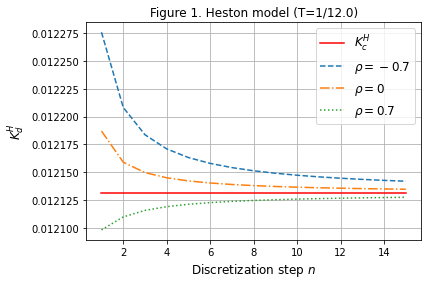

In [7]:
plt.plot(a, k_inf*np.ones_like(a), linestyle='-', color='r', label='$K_c^H$')
plt.plot(a, k_dis1, linestyle='--', label='$\\rho = -0.7$')
plt.plot(a, k_dis2, linestyle='-.', label='$\\rho = 0$')
plt.plot(a, k_dis3, linestyle=':', label='$\\rho = 0.7$')

plt.xlabel('Discretization step $n$', fontsize=12)
plt.ylabel('$K_d^H$', fontsize=12)
plt.title(f'Figure 1. Heston model (T=1/{1/texp})', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

# Heston Model: Figure 2. (Left Panel)

In [8]:
m = pf.HestonMcAndersen2008(0.8, vov=1, rho=0.6, mr=0.1, theta=0.019, intr=0.0319)

In [9]:
texp = 1
k_inf = m.strike_var_swap_analytic(texp, 0)

a = np.arange(2, 31)
dt = texp/a

m.vov = 0.5
k_dis1 = m.strike_var_swap_analytic(texp, dt)
m.vov = 1.5
k_dis2 = m.strike_var_swap_analytic(texp, dt)
m.vov = 2.0
k_dis3 = m.strike_var_swap_analytic(texp, dt)

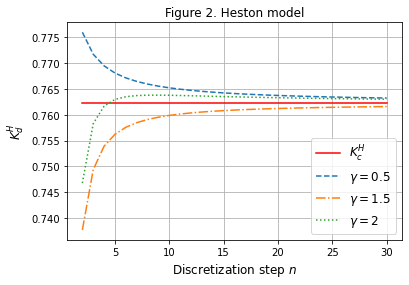

In [10]:
plt.plot(a, k_inf*np.ones_like(a), linestyle='-', color='r', label='$K_c^H$')
plt.plot(a, k_dis1, linestyle='--', label='$\\gamma = 0.5$')
plt.plot(a, k_dis2, linestyle='-.', label='$\\gamma = 1.5$')
plt.plot(a, k_dis3, linestyle=':', label='$\\gamma = 2$')

plt.xlabel('Discretization step $n$', fontsize=12)
plt.ylabel('$K_d^H$', fontsize=12)
plt.title('Figure 2. Heston model', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

# Schobel-Zhu (OUSV) Model: Figure 7.

In [11]:
### Any Ousv model will do.
m = pf.OusvFft(0.101, vov=0.31, rho=-0.7, mr=6.21, theta=np.sqrt(0.019), intr=0.0319)

In [12]:
texp = 1
k_inf = m.strike_var_swap_analytic(texp, 0)

a = np.arange(0.5, 36, step=0.5)
dt = texp/a

m.rho = -0.7
k_dis1 = m.strike_var_swap_analytic(texp, dt)
m.rho = 0
k_dis2 = m.strike_var_swap_analytic(texp, dt)
m.rho = 0.7
k_dis3 = m.strike_var_swap_analytic(texp, dt)

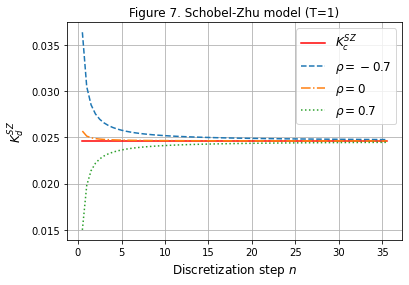

In [13]:
plt.plot(a, k_inf*np.ones_like(a), linestyle='-', color='r', label='$K_c^{SZ}$')
plt.plot(a, k_dis1, linestyle='--', label='$\\rho = -0.7$')
plt.plot(a, k_dis2, linestyle='-.', label='$\\rho = 0$')
plt.plot(a, k_dis3, linestyle=':', label='$\\rho = 0.7$')

plt.xlabel('Discretization step $n$', fontsize=12)
plt.ylabel('$K_d^{SZ}$', fontsize=12)
plt.title(f'Figure 7. Schobel-Zhu model (T={texp})', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [14]:
texp = 1/12
k_inf = m.strike_var_swap_analytic(texp, 0)
print(k_inf)

a = np.arange(1, 16)
dt = texp/a

m.rho = -0.7
k_dis1 = m.strike_var_swap_analytic(texp, dt)
m.rho = 0
k_dis2 = m.strike_var_swap_analytic(texp, dt)
m.rho = 0.7
k_dis3 = m.strike_var_swap_analytic(texp, dt)

0.014834236730984631


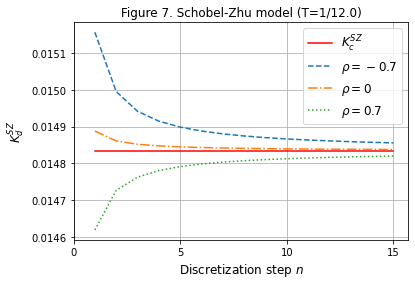

In [15]:
plt.plot(a, k_inf*np.ones_like(a), linestyle='-', color='r', label='$K_c^{SZ}$')
plt.plot(a, k_dis1, linestyle='--', label='$\\rho = -0.7$')
plt.plot(a, k_dis2, linestyle='-.', label='$\\rho = 0$')
plt.plot(a, k_dis3, linestyle=':', label='$\\rho = 0.7$')

plt.xlabel('Discretization step $n$', fontsize=12)
plt.ylabel('$K_d^{SZ}$', fontsize=12)
plt.title(f'Figure 7. Schobel-Zhu model (T=1/{1/texp})', fontsize=12)
plt.legend(fontsize=12)
plt.xticks([0,5,10,15])
plt.grid()
plt.show()

## Figure 8: $\rho_0^{SZ}$ to make the first order term zero

In [16]:
m = pf.OusvFft(0.101, vov=0.31, rho=0.054, mr=6.21, theta=np.sqrt(0.019), intr=0.0)
texp = 1
k_inf = m.strike_var_swap_analytic(texp, 0)
k_dis = m.strike_var_swap_analytic(texp, 1/250)
k_dis - k_inf

-4.155822904972073e-07

In [17]:
m = pf.OusvFft(0.101, vov=0.31, rho=0.040, mr=6.21, theta=np.sqrt(0.019), intr=0.0319)
texp = 1
k_inf = m.strike_var_swap_analytic(texp, 0)
k_dis = m.strike_var_swap_analytic(texp, 1/250)
k_dis - k_inf

9.43875956491147e-07

In [18]:
m = pf.OusvFft(0.101, vov=0.31, rho=0.177, mr=6.21, theta=np.sqrt(0.019), intr=0.06)
texp = 1
k_inf = m.strike_var_swap_analytic(texp, 0)
k_dis = m.strike_var_swap_analytic(texp, 1/250)
k_dis - k_inf

4.33170945757233e-06